In [85]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [86]:
df = pd.read_csv('car_sales_data.csv')
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [87]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [89]:
df.shape

(50000, 7)

In [90]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

<Axes: xlabel='Manufacturer', ylabel='count'>

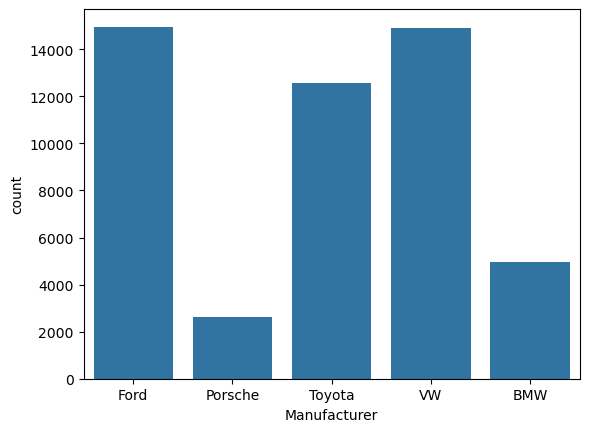

In [91]:
sns.countplot(x=df['Manufacturer'])

<Axes: xlabel='count', ylabel='Fuel type'>

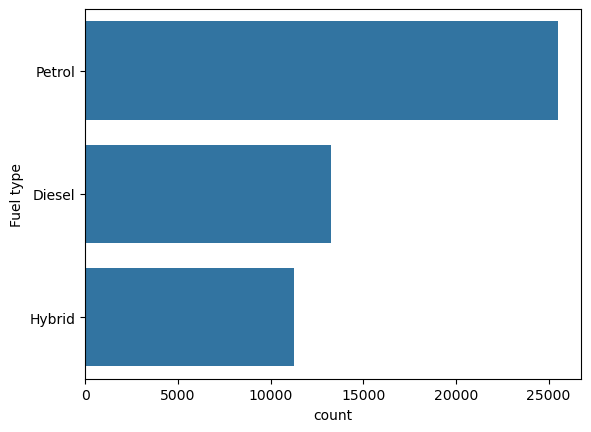

In [92]:
sns.countplot(df['Fuel type'])

<Axes: xlabel='count', ylabel='Model'>

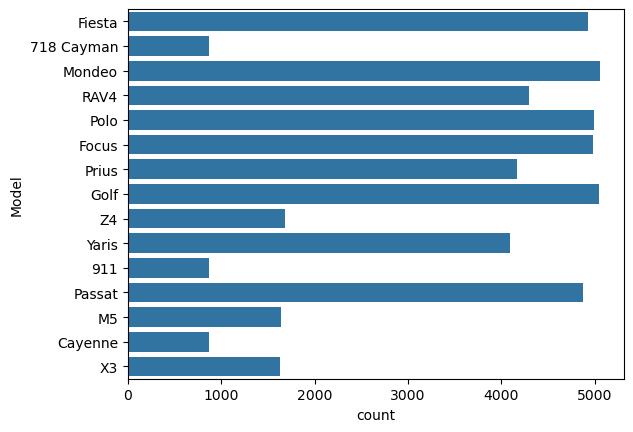

In [93]:
sns.countplot(df['Model'])

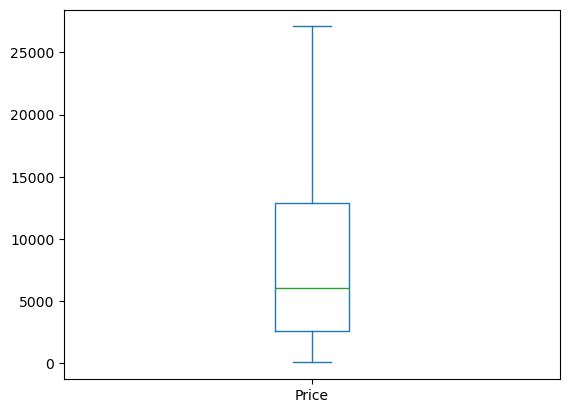

In [94]:
price_limit = df['Price'].quantile(0.85)
df_no_outliers = df[df['Price'] < price_limit] 
df_no_outliers['Price'].plot(kind='box')
plt.show()

In [95]:
dummy_params = list({'Manufacturer', 'Model', 'Fuel type'})

In [96]:
params = df_no_outliers.copy()

params['MileageLog'] = np.log(params['Mileage'])


if len(dummy_params) > 0:
    params = pd.get_dummies(params, columns=dummy_params, drop_first=False)

params

,Engine size,Year of manufacture,Mileage,Price,MileageLog,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_Petrol,Model_718 Cayman,Model_911,...,Model_Prius,Model_RAV4,Model_X3,Model_Yaris,Model_Z4,Manufacturer_BMW,Manufacturer_Ford,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_VW
0,1.0,2002,127300,3074,11.754302,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,1.6,2014,39190,24072,10.576177,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,1.8,1988,210814,1705,12.258732,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1.0,2006,127869,4101,11.758762,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
6,1.8,2010,86686,14350,11.370048,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,1.8,2003,120969,6654,11.703290,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
49994,1.8,2002,101634,10639,11.529133,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
49996,1.8,2003,105120,9430,11.562858,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
49998,1.0,2016,26468,23630,10.183692,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


<Axes: >

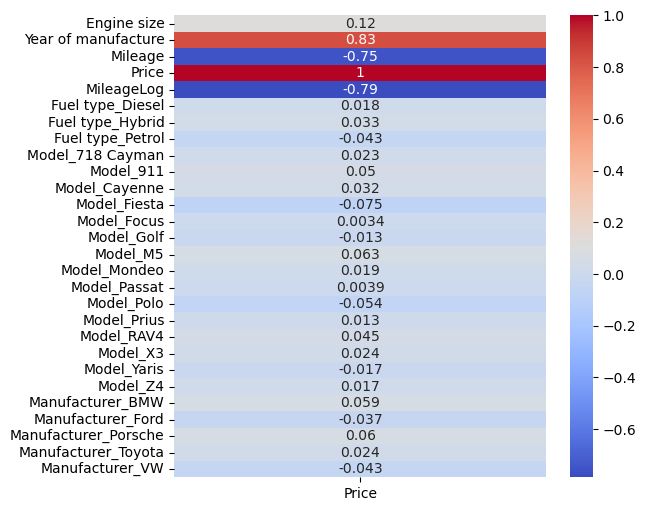

In [97]:
plt.figure(figsize=(6,6))
sns.heatmap(params.corr()[['Price']], annot=True, cmap='coolwarm')

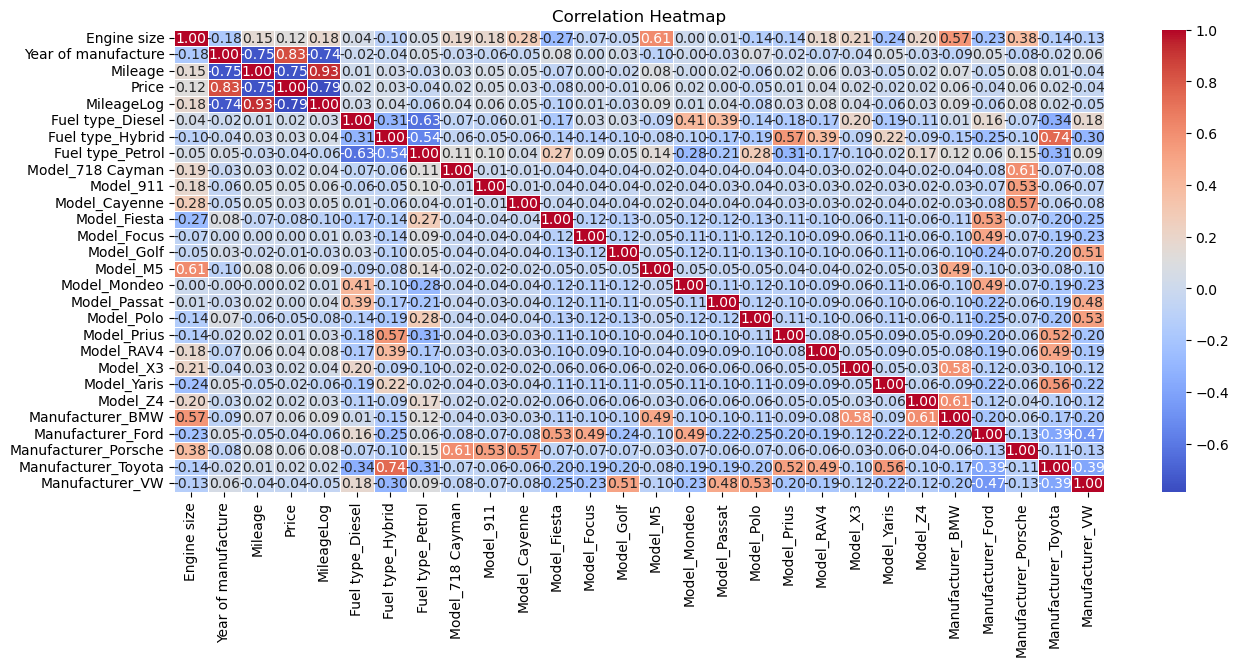

In [98]:
plt.figure(figsize=(15,6))
sns.heatmap(params.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [99]:
y = params['Price']
x = params.drop(columns='Price').astype(float)
results = []
for col in x.columns:
    X = sm.add_constant(params[col])
    model = sm.OLS(y, X.astype(float)).fit()
    results.append({
        'Predictor': col,
        'Coefficient': model.params[col],
        'p-value': model.pvalues[col],
        'R^2': model.rsquared
    })

results_df = pd.DataFrame(results)
results_df


,Predictor,Coefficient,p-value,R^2
0,Engine size,1290.688313,2.381257e-129,0.013683
1,Year of manufacture,684.202808,0.000000e+00,0.695834
2,Mileage,-0.077913,0.000000e+00,0.563881
3,MileageLog,-8720.444774,0.000000e+00,0.617325
4,Fuel type_Diesel,282.456424,2.999727e-04,0.000308
5,Fuel type_Hybrid,574.162987,7.992716e-12,0.001100
6,Fuel type_Petrol,-607.796155,1.216552e-18,0.001826
7,Model_718 Cayman,1357.868178,3.225288e-06,0.000510
8,Model_911,3405.430731,1.641515e-24,0.002454
9,Model_Cayenne,2059.596135,4.060214e-11,0.001025


In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
X_full_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_full_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Sat, 06 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:24:11   Log-Likelihood:            -3.1353e+05
No. Observations:               34000   AIC:                         6.271e+05
Df Residuals:                   33979   BIC:                         6.273e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.873e+05   3064.404   -191.649      0.000   -5.93e+05   -5.81e+05
Engine size           1881.5161     44.231     42.538      0.000    1794.821    1968.211
Year of manufacture    508.0126      2.367    214.642      0.000     503.374     512.652
Mileage                  0.0190      0.001     35.656      0.000       0.018       0.020
MileageLog           -6340.8705     56.258   -112.710      0.000   -6451.139   -6230.602
Fuel type_Diesel      -1.96e+05   1022.215   -191.724      0.000   -1.98e+05   -1.94e+05
Fuel type_Hybrid      -1.95e+05   1021.766   -190.863      0.000   -1.97e+05   -1.93e+05
Fuel type_Petrol     -1.963e+05   1021.833   -192.095      0.000   -1.98e+05   -1.94e+05
Model_718 Cayman     -4.007e+04    226.051   -177.280      0.000   -4.05e+04   -3.96e+04
Model_911            -3.627e+04    226.965   -159.797      0.000   -3.67e+04   -3.58e+04
Model_Cayenne        -3.924e+04    228.624   -171.654      0.000   -3.97e+04   -3.88e+04
Model_Fiesta         -4.135e+04    208.442   -198.354      0.000   -4.18e+04   -4.09e+04
Model_Focus          -3.853e+04    207.206   -185.965      0.000   -3.89e+04   -3.81e+04
Model_Golf           -3.957e+04    207.385   -190.793      0.000      -4e+04   -3.92e+04
Model_M5              -3.79e+04    229.042   -165.458      0.000   -3.83e+04   -3.74e+04
Model_Mondeo         -3.856e+04    208.017   -185.358      0.000    -3.9e+04   -3.81e+04
Model_Passat         -3.814e+04    207.631   -183.674      0.000   -3.85e+04   -3.77e+04
Model_Polo           -4.087e+04    208.073   -196.398      0.000   -4.13e+04   -4.05e+04
Model_Prius          -3.909e+04    209.100   -186.965      0.000   -3.95e+04   -3.87e+04
Model_RAV4           -3.798e+04    209.051   -181.665      0.000   -3.84e+04   -3.76e+04
Model_X3             -3.926e+04    215.527   -182.157      0.000   -3.97e+04   -3.88e+04
Model_Yaris           -4.08e+04    209.119   -195.091      0.000   -4.12e+04   -4.04e+04
Model_Z4             -3.967e+04    215.685   -183.931      0.000   -4.01e+04   -3.92e+04
Manufacturer_BMW     -1.168e+05    614.531   -190.109      0.000   -1.18e+05   -1.16e+05
Manufacturer_Ford    -1.184e+05    613.603   -193.017      0.000    -1.2e+05   -1.17e+05
Manufacturer_Porsche -1.156e+05    615.021   -187.940      0.000   -1.17e+05   -1.14e+05
Manufacturer_Toyota  -1.179e+05    613.779   -192.038      0.000   -1.19e+05   -1.17e+05
Manufacturer_VW      -1.186e+05    613.694   -193.206      0.000    -1.2e+05   -1.17e+05
==============================================================================
Omnibus:                     3382.543   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5070.225
Skew:                           0.758   Prob(JB):                         0.00
Kurtosis

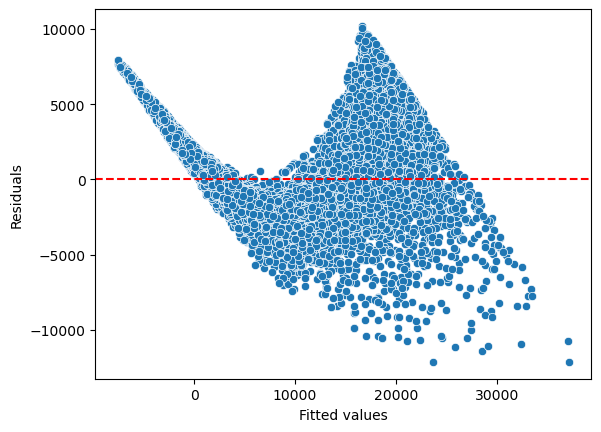

In [102]:
sns.scatterplot(x=model.fittedvalues, y=model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

In [103]:
X_full_test = sm.add_constant(X_test)
y_pred_lin = model.predict(X_full_test)

In [104]:
mse = skm.mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)
mae = skm.mean_absolute_error(y_test, y_pred_lin)
r2 = skm.r2_score(y_test, y_pred_lin)
print(f"MSE={mse:.2f}, RMSE={rmse:.2f}, MAE={mae:.2f}, R^2={r2:.2f}")

MSE=6273362.97, RMSE=2504.67, MAE=1938.57, R^2=0.88


In [105]:
model_tree = DecisionTreeRegressor()
model_tree.fit(X_full_train, y_train)
y_pred_tree = model_tree.predict(X_full_test)

In [106]:
mse = skm.mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
mae = skm.mean_absolute_error(y_test, y_pred_tree)
r2 = skm.r2_score(y_test, y_pred_tree)
print(f"MSE={mse:.2f}, RMSE={rmse:.2f}, MAE={mae:.2f}, R^2={r2:.2f}")

MSE=374973.22, RMSE=612.35, MAE=331.64, R^2=0.99
